# Computing Returns
Understanding how returns are computed, annualized and compared is essential for the purposes of strategy comparison and any form of programmed asset management. We will also use these methods to introduce the basics of this environemnt and properties used when coding.

Let us display the prices of an asset as they evolve overtime using a data type  (in this case a list):

In [12]:
prices_of_a_security = [100, 99, 103.02, 105.0804, 107, 109, 110, 125, 145, 5, 67]

Quick review of lists:
1. A list is a data structure in python
2. We can use lists (defined by brackets[]) to store integers, floats, strings and more
3. We can access elements of a list individually, entirely, or separately using slicing

Note: In a python list the index of elements are as follows [0,1,2,3,4,5]

- list[i] --> accesses the i'th element in the list, the element at index i
- list[:] --> accesses the entire list
- list[:2] --> accesses all elements until index 2
- list[1:4] --> accesses all elements from index 1 to index 4

In [8]:
example = [1,2,"yay",3.00,4,5,6]
print(example[-1])

6


### Using the 1+r approach

We can compute the first years return in 1+r format by assigning the result of the ratio between the (price in year 1 and price in year 0) and price in year 1 to a variable and printing it.

In [9]:
y1_return = (prices_of_a_security[1]-prices_of_a_security[0])/prices_of_a_security[0]
y1_return

-0.01

In [10]:
y1_return = prices_of_a_security[1]/prices_of_a_security[0]
print(round(y1_return,2))

0.99


Assuming we have the price for available for the first n years, we can create our own list to compute n years worth of returns:

In [13]:
#Create a list where we will store the returns of our security
security_returns = []

#Use a for loop to iterate through our price list and gather return information

i=0
while i+1 < len(prices_of_a_security):
    returns = prices_of_a_security[i+1]/prices_of_a_security[i]
    security_returns.append(returns)
    i+=1


for returns in security_returns:
    print(round(returns,4))

    

0.99
1.0406
1.02
1.0183
1.0187
1.0092
1.1364
1.16
0.0345
13.4


### How does this affect our holdings?

Now that we have created a list with our returns for each consecutive year, we can create a wealth index given a initial amount invested which we will call initial_investment:


In [15]:
initial_investment = 2891.57

print(security_returns)

factor = 1
for returns in security_returns:
    factor = factor * returns

initial_investment *= factor

print(round(initial_investment,2))

[0.99, 1.0406060606060605, 1.02, 1.0182679167570736, 1.0186915887850467, 1.0091743119266054, 1.1363636363636365, 1.16, 0.034482758620689655, 13.4]
1937.35


# Using Numpy and Pandas to Compute Returns

Although working with lists seems convenient, there are much more efficient and clear ways to do these computations using pre-defined methods in libraries such as numpy and pandas. 

The reason being:

- Working with arrays and data frames allows us to be more efficient

- The people who built numpy and pandas included extremely useful methods for us to compute percentage changes and more


In [17]:
#First we must import these two libraries
import numpy as np
import pandas as pd

### Returns using Numpy

Numpy and Pandas will be useful mainly for a few diffrent purposes:

* Numpy and Pandas work together to automate processes for us
* We can cast returns into an array rather than keeping them as lists 
* We can use Pandas to not create the methods ourselves and use predefined





In [20]:
security_prices = np.array([100, 102, 110, 115, 120])
print(security_prices)

[100 102 110 115 120]



Remember how we use to for loop through each return in the list to find our list of returns? No longer!


In [24]:
security_returns_array = security_prices[1:]/security_prices[:-1]
security_returns_array

array([1.02      , 1.07843137, 1.04545455, 1.04347826])

In [23]:
security_prices[1:]/security_prices[:-1] - 1

array([0.02      , 0.07843137, 0.04545455, 0.04347826])

# Pandas for Stock Data Analysis

We've just seen the power of importing packages through the numpy example. As we will see Pandas has predefined methods 

Basic Pandas :

* pd.DataFrame({}) : Create a Data Frame

* df[:] : slice a dataframe (you control the rows)

* .iloc : integerlocation : Used to slice a pandas data dataframe and obtain desired rows

Computing Returns for your dataFrame

* df.iloc[1:].values / df.iloc[:-1]-1 : 


In [35]:
# We can also use Pandas to frame our data, rather than keep it in array format

stock_prices = pd.DataFrame({"STOCK_A": [10, 11, 12, 18, 33, 40, 33],
                      "STOCK_B":[7, 9, 8, 10, 11, 12, 14]
                      })

#We can play around to gather the rows we want
stock_prices[:]

,STOCK_A,STOCK_B
0,10,7
1,11,9
2,12,8
3,18,10
4,33,11
5,40,12
6,33,14


In [31]:
# The iloc method is part of the DataFrame Class, it allows us to extract rows out of a data frame
stock_prices.iloc[2:4]

,STOCK_A,STOCK_B
2,12,8
3,18,10


In [33]:
#Accessing one column in our DataFrame
stock_prices["STOCK_A"].head()

0    10
1    11
2    12
3    18
4    33
Name: STOCK_A, dtype: int64

## Computing Returns in a DataFrame
Using the predefined methods that are part of the pandas documentation, computing returns and changing our data Frame has never been easier. We can simply use the methods to perform computation on the data at hand, or even let those methods perform computations for us.

In [34]:
#Extracting returns from our data set
stock_prices.iloc[1:].values / stock_prices.iloc[:-1] -1

,STOCK_A,STOCK_B
0,0.100000,0.285714
1,0.090909,-0.111111
2,0.500000,0.250000
3,0.833333,0.100000
4,0.212121,0.090909
5,-0.175000,0.166667


In [50]:
# We can easily compute return for both stocks this way
stock_prices.iloc[1:]/ stock_prices.iloc[:-1].values

,STOCK_A,STOCK_B
1,1.100000,1.285714
2,1.090909,0.888889
3,1.500000,1.250000
4,1.833333,1.100000
5,1.212121,1.090909
6,0.825000,1.166667


In [40]:
# Method to shift prices down 1
stock_prices.shift()

,STOCK_A,STOCK_B
0,NaN,NaN
1,10.0,7.0
2,11.0,9.0
3,12.0,8.0
4,18.0,10.0
5,33.0,11.0
6,40.0,12.0


In [42]:
#Can also be used to compute our returns, for the first stock or the second stock
stock_a_returns = stock_prices.values / stock_prices.shift(1) - 1
stock_a_returns

,STOCK_A,STOCK_B
0,NaN,NaN
1,0.100000,0.285714
2,0.090909,-0.111111
3,0.500000,0.250000
4,0.833333,0.100000
5,0.212121,0.090909
6,-0.175000,0.166667


Thankfully, Pandas has already thought about this and has created methods that already do this.
As we will later see, the beauty of programming is that it is open source. 
Anyone can build a class, build methods and allow other to benefit from their efforts.

## Risk adjusted returns

How do we adjust our returns for the level of risk we are taking on

In [43]:
stock_prices.pct_change() #Add plus 1 if desired

,STOCK_A,STOCK_B
0,NaN,NaN
1,0.100000,0.285714
2,0.090909,-0.111111
3,0.500000,0.250000
4,0.833333,0.100000
5,0.212121,0.090909
6,-0.175000,0.166667


In [57]:
sampled_prices = pd.read_csv('Documents/sample_price_data.csv')
sampled_prices

,Stock A,Stock B
0,1.0,1.000000
1,1.1,1.020000
2,1.2,1.040400
3,1.1,1.061208
4,1.2,1.082432
5,1.1,1.104081
6,1.3,1.126162
7,1.2,1.148686
8,1.7,1.171659
9,1.3,1.195093


In [56]:
returns = sampled_prices.pct_change()
returns

,Stock A,Stock B
0,NaN,NaN
1,0.100000,0.02
2,0.090909,0.02
3,-0.083333,0.02
4,0.090909,0.02
5,-0.083333,0.02
6,0.181818,0.02
7,-0.076923,0.02
8,0.416667,0.02
9,-0.235294,0.02


In [65]:
returns.dropna()

,Stock A,Stock B
1,0.100000,0.02
2,0.090909,0.02
3,-0.083333,0.02
4,0.090909,0.02
5,-0.083333,0.02
6,0.181818,0.02
7,-0.076923,0.02
8,0.416667,0.02
9,-0.235294,0.02
10,-0.076923,0.02


In [58]:
returns.std()

Stock A    1.394596e-01
Stock B    3.156213e-10
dtype: float64

In [59]:
# This will give a slightly diffrent answer due to using population
# rather than sample distribution

deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = variance**0.5

# or we can do
volatility = np.sqrt(variance)
volatility

Stock A    1.365232e-01
Stock B    3.089759e-10
dtype: float64

In [60]:
returns.shape

(25, 2)

In [63]:
num_of_obs = returns.shape[0]
variance = squared_deviations.sum() / (num_of_obs - 2)
volatility = variance**0.5
volatility

Stock A    1.394596e-01
Stock B    3.156213e-10
dtype: float64

In [72]:
returns.std()*np.sqrt(12)

Stock A    4.831021e-01
Stock B    1.093344e-09
dtype: float64

-----------------------------------------------------------------------

# How will get access stock Data?

To get access to stock data we have multiple possibilities:

1. Find an excel file and read it into Python

This can be done using using the read_csv function we have already seen in the following fashion: 

- dataframe = pd.read_csv('File Path')


2. Import packages into our python code and use predefined methods to access the data

This can be done using the pandad_datareader.data package for example which we can import as web to shorten its name:

- import pandas_datareader.data as web
- web.DataReader("StockTicker", "source", start_date, end_date)

3. Use a combination of both! We can import the data using the data reader and  the .to_csv method to download:

- import pandas_datareader.data as web
- stock = web.DataReader("StockTicker", "source", start_date, end_date)
- stock.to_csv("FilePath.csv")

NOTE: To access the data reader you must first pip install the pandas data_reader package. To do this use your terminal and simply type in:

- pip install pandas-datareader


# What is the data reader?


Data Reader is a package that allows you to read off of important stock API's such as AlphaVantage, NASDAQ API, St.Louis FED (FRED, Yahoo Finance and more. It will most definitely the most useful thing you can use to access stock data.

You can find information regarding this package at this link:
https://readthedocs.org/projects/pandas-datareader/downloads/pdf/latest/


In [1]:
import numpy as np
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

In [3]:
start = dt.datetime(2017,1,1)
end = dt.datetime(2021,3,15)

In [4]:
google = web.DataReader("GOOGL", 'yahoo',start,end)
apple = web.DataReader("AAPL", "yahoo",start,end)

In [21]:
# apple.head()

In [14]:
#Note that we can play around with this dataFrame
apple['Returns'] = apple['Adj Close'].pct_change()
google['Returns'] = google['Adj Close'].pct_change()

In [35]:
# apple.tail()

In [20]:
# apple.iloc[50:100]

# Let's visualize our data

To visualize our data we will use matplotlib to generate time series graphs, histograms scatterplots and more. Again, matplotlib is a python library that can be imported into your code. The library contains functions and methods that can be used from within python.


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

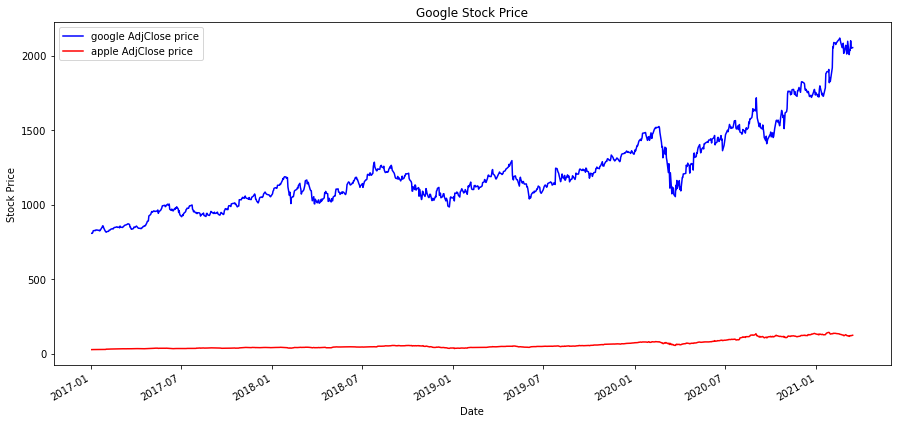

In [24]:
# We can plot time series using the .plot method in the matplotlib library
# Other methods such as plt.legend are used to obtain a legend in our graph
# We can also change the size of our plot using figsize

google["Adj Close"].plot(label = 'google AdjClose price', color = 'blue', figsize = (15,7))
apple["Adj Close"].plot(label = 'apple AdjClose price', color = 'red')

plt.legend()
plt.title('Google Stock Price')
plt.ylabel("Stock Price")
plt.show()

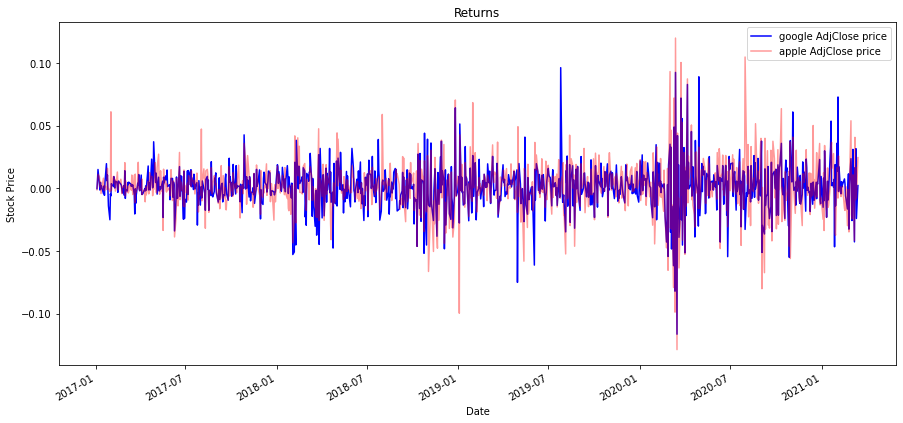

In [34]:
google["Returns"].plot(label = 'google AdjClose price', color = 'blue', figsize = (15,7))
apple["Returns"].plot(label = 'apple AdjClose price', color = 'red', alpha = 0.4)

plt.legend()
plt.title('Returns')
plt.ylabel("Stock Price")
plt.show()

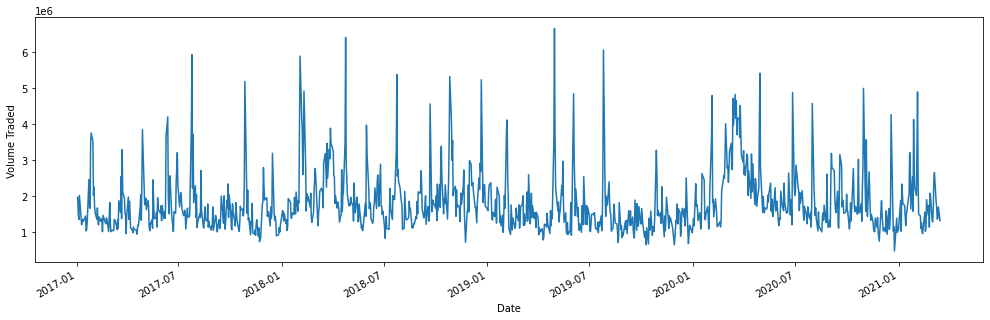

In [66]:
# We can also plot other metrics in our data frame like volumes

google['Volume'].plot(figsize = (17,5))
plt.ylabel("Volume Traded")
plt.show()

# Dowloading and reading Data in from Excel 

As mentioned, if we would like to have the files on our own computer and read them in from excel, this is possible! We use the .to_csv function to do so. This function is part of the pandas library and allows us to store a data frame found online into a csv file.

## What is a file path?
A file path is a string used to denote the place in your computer where is a file is or should go. The typical format for a file path is as follows:

- 'Directory/subdirectory/filename.filetype'

In [36]:
tesla = web.DataReader("TSLA", 'yahoo', start , end)
tesla.to_csv('Documents/Trading/Tesla_Stock.csv')

You can now find this file in your documents in the specific filepath you created for it

In [47]:
tesla['Returns'] = tesla["Adj Close"].pct_change()
tesla.to_csv('Documents/Trading/Tesla_Stock.csv')

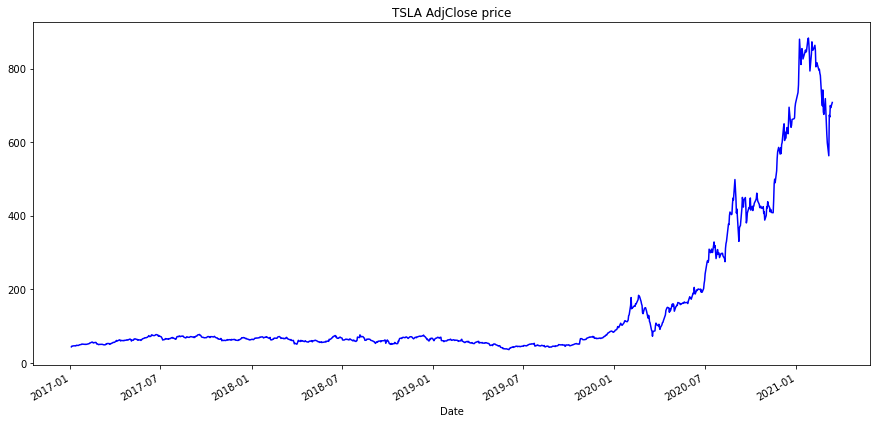

In [42]:
tesla["Adj Close"].plot(title = 'TSLA AdjClose price', 
                        color = 'blue',
                        figsize = (15,7))
plt.show()

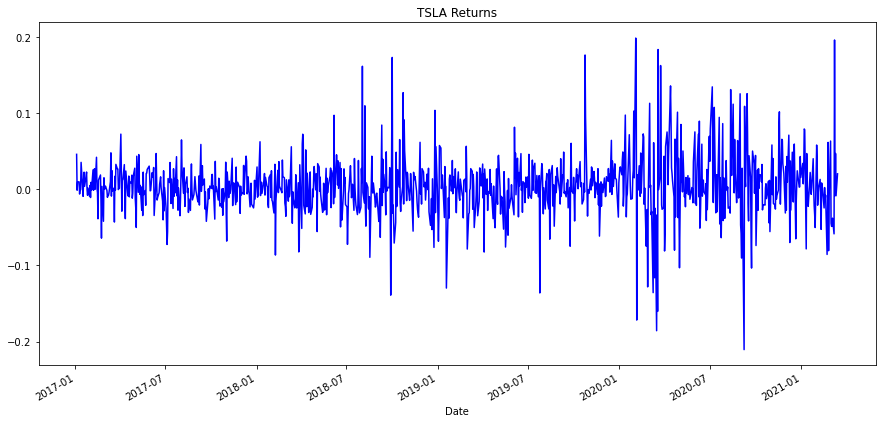

In [43]:
tesla["Returns"].plot(title = 'TSLA Returns',
                        color = 'blue',
                        figsize = (15,7))
plt.show()

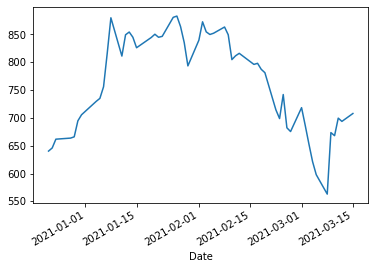

In [54]:
tesla.iloc[1000:1056]["Adj Close"].plot( label = "TSLA Adj Close Price sample")
plt.show()

In [68]:
# Finding Volume in dollars
tesla["Shares Traded"] = tesla["Volume"] / tesla["Open"]
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Total Traded,Shares Traded
Date,,,,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999,NaN,6.892046e+05,6.892046e+05
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999,0.046085,1.305413e+06,1.305413e+06
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998,-0.001057,6.527361e+05,6.527361e+05
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998,0.009967,6.089873e+05,6.089873e+05
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001,0.009912,4.345002e+05,4.345002e+05


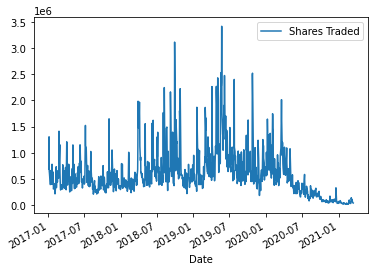

In [70]:
tesla['Shares Traded'].plot(label = "Shares Traded", )
plt.ylabel = "Volume"
plt.legend()
plt.show()

In [71]:
# How can we find the day that Teslas Volume peaked?
tesla["Total Traded"].argmax()

600

In [72]:
tesla.iloc[[tesla["Total Traded"].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Returns,Total Traded,Shares Traded
Date,,,,,,,,,
2019-05-23,39.894001,37.243999,38.868,39.098,132735500.0,39.098,0.014321,3.415033e+06,3.415033e+06


In [74]:
tesla["MA 50"] = tesla["Adj Close"].rolling(30).mean()

In [75]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close,Returns,Total Traded,Shares Traded,MA 50
Date,,,,,,,,,,
2021-03-09,678.090027,595.210022,608.179993,673.580017,67523300.0,673.580017,0.196412,111025.191248,111025.191248,766.045667
2021-03-10,717.849976,655.059998,700.299988,668.059998,60605700.0,668.059998,-0.008195,86542.483302,86542.483302,758.877999
2021-03-11,702.500000,677.179993,699.400024,699.599976,36253900.0,699.599976,0.047211,51835.714519,51835.714519,753.392666
2021-03-12,694.880005,666.140015,670.000000,693.729980,33583800.0,693.729980,-0.008391,50125.074627,50125.074627,748.669332
2021-03-15,713.179993,684.039978,694.090027,707.940002,29335600.0,707.940002,0.020484,42264.834337,42264.834337,745.816331


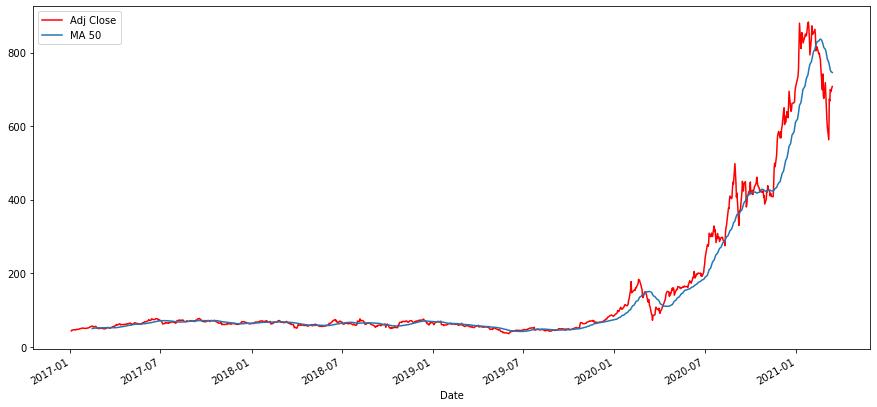

In [76]:
tesla["Adj Close"].plot(color = "red", figsize = (15,7))
tesla["MA 50"].plot()
plt.legend()
plt.show()

# Passive investing : is this a good idea?

Now we get to the good stuff.

Let us assume we are passive investors, we take Buffet's adivce and invest in the SnP. We know how to get access to the data, and we also know how to work with DataFrames. We can use these to compute the formulas we saw at the beginning of class including Expected Return, Portfolio Risk and the Sharpe Ratio of the Portfolio.

Goals: 

1. Find the SnP Data
2. Create our wealth index
3. Visualize our ROI

In [55]:
# First we can make sure we've got everything imported
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# Let's pick a time frame to evaluate our stocks on
start = dt.datetime(1960,1,1)
end = dt.datetime(2021,1,30)

In [75]:
snp = web.DataReader("^GSPC", "yahoo", start, end)

In [82]:
snp.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000,59.910000,NaN
1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000,60.389999,0.008012
1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000,60.130001,-0.004305
1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000,59.689999,-0.007318
1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000,59.500000,-0.003183


In [83]:
# Lets build a data Frame with the Adj Close of each stock 
snp["Returns"] = snp['Adj Close'].pct_change()

In [85]:
snp.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000,59.910000,NaN
1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000,60.389999,0.008012
1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000,60.130001,-0.004305
1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000,59.689999,-0.007318
1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000,59.500000,-0.003183


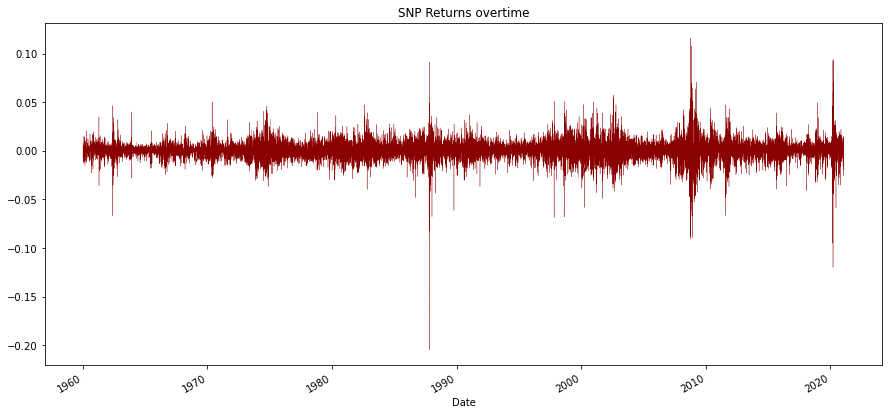

In [94]:
snp["Returns"].plot(title = "SNP Returns overtime", 
                    color = 'darkred', 
                    figsize = (15,7), 
                    alpha = 1,
                    linewidth = 0.3)
plt.show()

In [95]:
#We can create a return column using the shift method

snp['Returns'] = (snp["Adj Close"]/snp["Adj Close"].shift(1)) -1

In [96]:
snp.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000,59.910000,NaN
1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000,60.389999,0.008012
1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000,60.130001,-0.004305
1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000,59.689999,-0.007318
1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000,59.500000,-0.003183


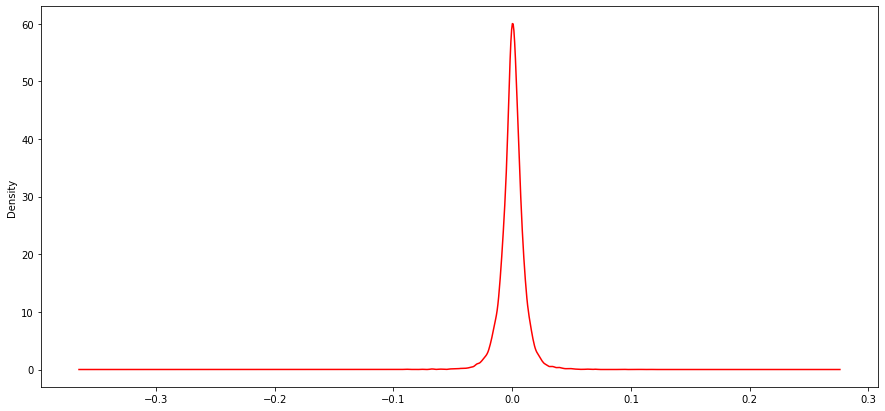

In [100]:
snp['Returns'].plot(kind = 'kde', label = 'SnP 500', figsize = (15,7), color = "red")
plt.show()

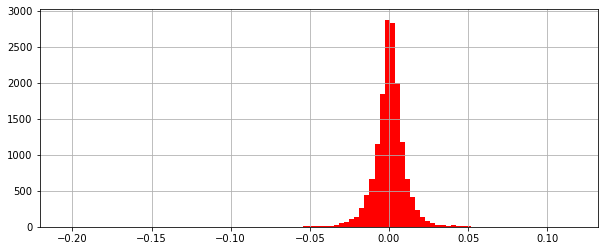

In [117]:
snp['Returns'].hist(bins = 100, label = 'SnP 500', figsize = (10,4), color = "red")
plt.show()

In [109]:
snp["Cumulative Returns"] = (1 + snp["Returns"]).cumprod()

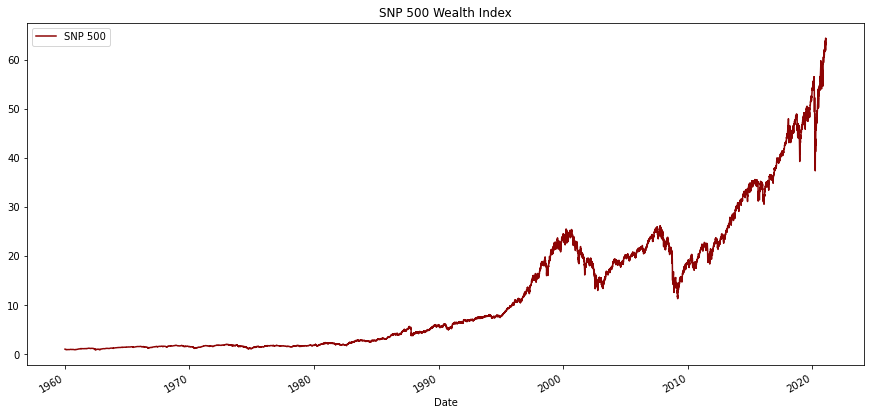

In [118]:
snp["Cumulative Returns"].plot(title = "SNP 500 Wealth Index", label = "SNP 500", figsize = (15,7), alpha = 5, color = "darkred")
plt.legend()
plt.show()

# Correlations and Covariance Matrix

We can view stock prices as random variables and evaluate visually the correlations between securities. As we can see here, there seems to be a postitive correlation between both securities, but we cannot assume anythign without conducting the proper tests

In [92]:
from pandas.plotting import scatter_matrix

In [85]:
companies = pd.concat([tesla['Adj Close'],google['Adj Close']], axis = 1)
companies.columns = ['Tesla Adj Close', 'Google Adj Close']

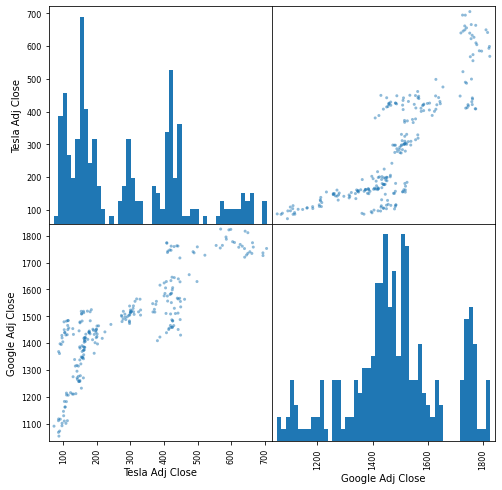

In [91]:
scatter_matrix(companies, figsize = (8,8), hist_kwds = {'bins':50})
plt.show()

## Daily Percentage Change

## Cumulative Return and the Wealth Index

We know the cumulative to be equal to the sum of daily returns + 1. We can build a wealth index to see how the value of our portfolio would have evolved. 

A wealth index allows us to visualize how our wealth would have grown overtime if we had provided an initial investment. Wealth indexes are typically used to present new indexes and instruments to potential investors and funds, so as to convince the investor of the returns the financial product is able to generate.

How do we create a wealth index?

In [116]:
tesla['Returns'] = tesla["Adj Close"]/tesla["Adj Close"].shift(1) -1 
google['Returns'] = google["Adj Close"]/google["Adj Close"].shift(1) -1 

In [125]:
# To create a wealth index, we can simply create a new column 
snp["Cumulative Returns"] = (1 + snp["Returns"]).cumprod()

In [103]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA 50,returns,Returns
Date,,,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,4.046377e+09,NaN,NaN,NaN
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,7.831429e+09,NaN,0.029633,0.029633
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,4.463283e+09,NaN,0.019255,0.019255
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,8.250801e+09,NaN,0.038801,0.038801
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,1.475305e+10,NaN,0.049205,0.049205


In [52]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Returns,Total Traded,MA 50
Date,,,,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999,NaN,1.272680e+09,NaN
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999,0.046085,2.408099e+09,NaN
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998,-0.001057,1.338527e+09,NaN
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998,0.009967,1.254446e+09,NaN
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001,0.009912,9.111861e+08,NaN


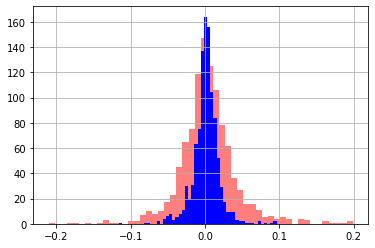

In [123]:
tesla['Returns'].hist(bins=50, color = 'red', alpha = 0.5)
google['Returns'].hist(bins=50, color = 'blue', alpha = 1)
plt.ylabel = "Frequency"
plt.xlabel = "Returns"
plt.show()

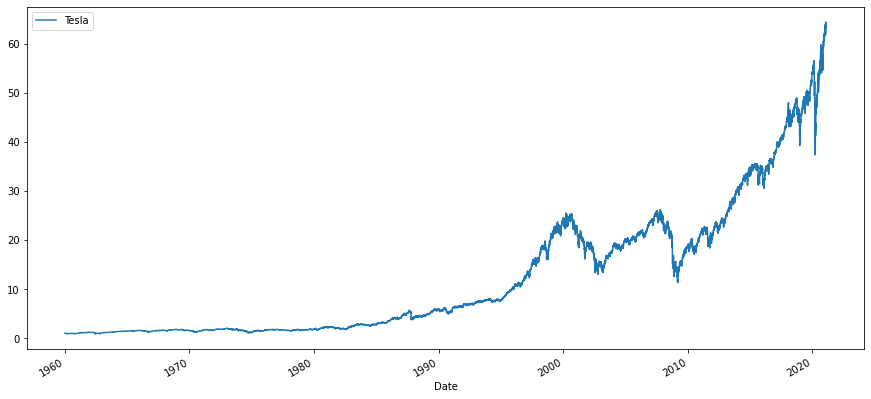

In [126]:
snp["Cumulative Returns"].plot(label = "Tesla", figsize = (15,7))
plt.legend()
plt.show()

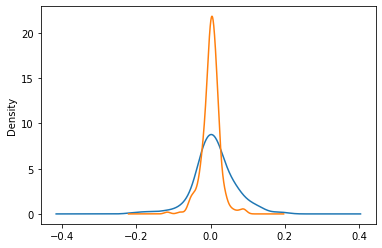

In [121]:
tesla['Returns'].plot(kind = 'kde', label = 'Tesla')
google['Returns'].plot(kind = 'kde', label = 'Google')
plt.show()

# Creating a correlation Matrix

In [129]:
import seaborn

In [130]:
symbols_list = ['AAPL', 'F', 'TWTR', 'FB', 'AAL', 'AMZN', 'GOOGL', 'GE', 'TSLA', 'IBM', 'PYPL']
#array to store prices
symbols=[]

In [138]:
#array to store prices
symbols=[]
for ticker in symbols_list:     
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()

In [137]:
df_pivot.tail()

Symbol,Date,AAL,AAPL,AMZN,F,FB,GE,GOOGL,IBM,PYPL,TSLA,TWTR
14899,2021-03-11,22.150000,121.959999,3113.590088,12.81,273.880005,12.27,2100.540039,127.139999,253.830002,699.599976,68.459999
14900,2021-03-12,23.370001,121.029999,3089.489990,13.37,268.399994,12.58,2050.000000,127.610001,250.350006,693.729980,68.099998
14901,2021-03-15,25.170000,123.989998,3081.679932,13.20,273.750000,13.35,2054.439941,128.580002,249.979996,707.940002,70.279999
14902,2021-03-16,24.469999,125.570000,3091.860107,12.49,279.279999,13.15,2083.889893,128.240005,249.309998,676.880005,69.250000
14903,2021-03-17,25.160000,124.760002,3135.729980,12.69,284.010010,13.61,2082.219971,129.029999,251.470001,701.809998,70.199997


In [135]:
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,AAL,AAPL,AMZN,F,FB,GE,GOOGL,IBM,PYPL,TSLA,TWTR
Symbol,,,,,,,,,,,
AAL,1.000000,0.099891,0.123817,0.272186,0.036605,0.417170,0.278905,-0.035367,-0.747647,-0.098212,-0.360234
AAPL,0.099891,1.000000,0.967166,-0.005785,0.877202,-0.027537,0.945949,0.520946,0.969442,0.876010,0.340817
AMZN,0.123817,0.967166,1.000000,-0.292629,0.935542,-0.591809,0.960643,0.259185,0.962175,0.759475,0.236930
F,0.272186,-0.005785,-0.292629,1.000000,-0.666775,0.779332,0.003572,0.527632,-0.610011,-0.340188,0.150763
FB,0.036605,0.877202,0.935542,-0.666775,1.000000,-0.649568,0.971498,-0.832614,0.924859,0.658354,0.067366
GE,0.417170,-0.027537,-0.591809,0.779332,-0.649568,1.000000,-0.549074,0.694604,-0.735164,-0.376230,-0.338259
GOOGL,0.278905,0.945949,0.960643,0.003572,0.971498,-0.549074,1.000000,0.188660,0.959806,0.725371,0.186778
IBM,-0.035367,0.520946,0.259185,0.527632,-0.832614,0.694604,0.188660,1.000000,-0.633608,-0.459283,0.082940
PYPL,-0.747647,0.969442,0.962175,-0.610011,0.924859,-0.735164,0.959806,-0.633608,1.000000,0.872906,0.834788


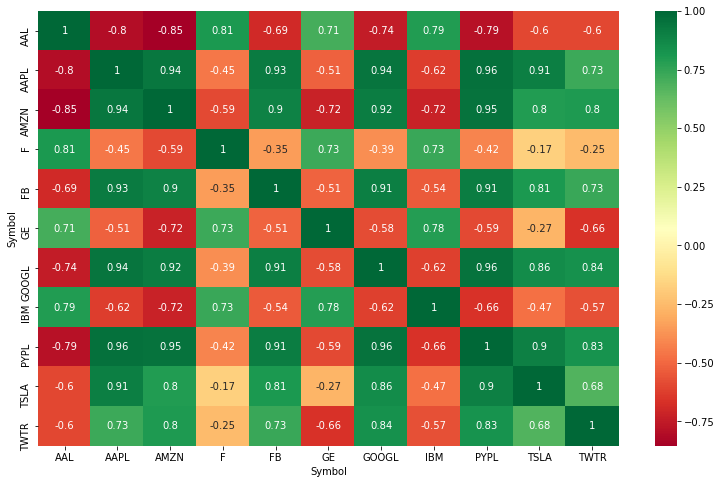

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap="RdYlGn")
plt.figure()
plt.show()

# Creating your own stock portflio 
### Measuring risk & return

Now we get to the good stuff.

Let us assume we are passive investors, we take Buffet's adivce and invest in the SnP. We know how to get access to the data, and we also know how to work with DataFrames. We can use these to compute the formulas we saw at the beginning of class including Expected Return, Portfolio Risk and the Sharpe Ratio of the Portfolio.

Goals: 

1. Find the SnP Data
2. Compute the Ex-Ante estimate of expected return for the portfolio
3. Compute the estimate of risk for the portfolio
4. Compute the Sharpe Ratio of the Portfolio

* $E(R) =$
* $\sigma = $ 
* $Sharpe Ratio = $


In [92]:
# Lets create our FAANG portfolio
symbols = ['FB','AMZN', 'AAPL', 'NFLX','GOOGL']

#We get our price data by inputting a list, rather than a ticker as input to our get_data_yahoo function
price_data = web.get_data_yahoo(symbols,
                               start = '2015-01-01',
                               end = '2021-01-01')

# price_data.head()

In [93]:
price_data = price_data['Adj Close']
price_data.head()

Symbols,FB,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2015-01-02,78.449997,308.519989,24.861401,49.848572,529.549988
2015-01-05,77.190002,302.190002,24.161013,47.311428,519.460022
2015-01-06,76.150002,295.290009,24.163294,46.501431,506.640015
2015-01-07,76.150002,298.420013,24.502111,46.742859,505.149994
2015-01-08,78.180000,300.459991,25.443539,47.779999,506.910004


In [95]:
w = [0.2,0.2,0.2,0.2,0.2]

In [97]:
ret_data = price_data.pct_change()[1:]
ret_data.head()

Symbols,FB,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.019054
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.024679
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.002941
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003484
2015-01-09,-0.005628,-0.011749,0.001072,-0.015458,-0.012211


In [98]:
weighted_returns = (w * ret_data)
weighted_returns.head()

Symbols,FB,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2015-01-05,-0.003212,-0.004103,-0.005634,-0.010179,-0.003811
2015-01-06,-0.002695,-0.004567,0.000019,-0.003424,-0.004936
2015-01-07,0.000000,0.002120,0.002804,0.001038,-0.000588
2015-01-08,0.005332,0.001367,0.007684,0.004438,0.000697
2015-01-09,-0.001126,-0.002350,0.000214,-0.003092,-0.002442


In [115]:
port_ret = weighted_returns.sum(axis=1)
port_ret.head()

Date
2015-01-05   -0.026940
2015-01-06   -0.015602
2015-01-07    0.005375
2015-01-08    0.019518
2015-01-09   -0.008795
dtype: float64

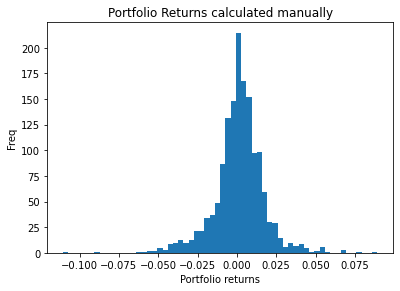

In [116]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show()

In [105]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print(mean_ret)

0.001386153809550311


In [106]:
print(std_returns)

0.01620846990889265
